# IMPORTING THE NECESSARY LIBRARIES

In [200]:
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [202]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",names=["Id","Ri","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"])
df        #loading the dataset from Github repository link using raw option

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [203]:
df.head()     #checking the top 5 columns of the dataset

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [204]:
df.tail() #checking the last columns of the dataset

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.sample(9) #checing some random columns of the dataset

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
47,48,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1
73,74,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.0,0.00,2
192,193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
15,16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.0,0.00,1
53,54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.0,0.00,1
110,111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.0,0.00,2
63,64,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.0,0.00,1
101,102,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00,2
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.0,0.34,2


In [205]:
df.columns #looking for the name of columns present in the dataset

Index(['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [206]:
df.dtypes #fetching out the data types of objects present in the dataset

Id                 int64
Ri               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

In [207]:
df.info()    #getting the info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   Ri             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [208]:
df.isnull().sum()      #checking in nun values are present in the dataset or not

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [209]:
df.drop('Id',axis=1, inplace=True)       #DROPPING THE ID COLUMN AS IT IS OF NO USE

In [26]:
df["Type of Glass"].unique()     #LOOKING FOR UNIQUE VALUES IN DATASET

array([1, 2, 3, 5, 6, 7], dtype=int64)


# VISUALIZATION

Value count:- 
 2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


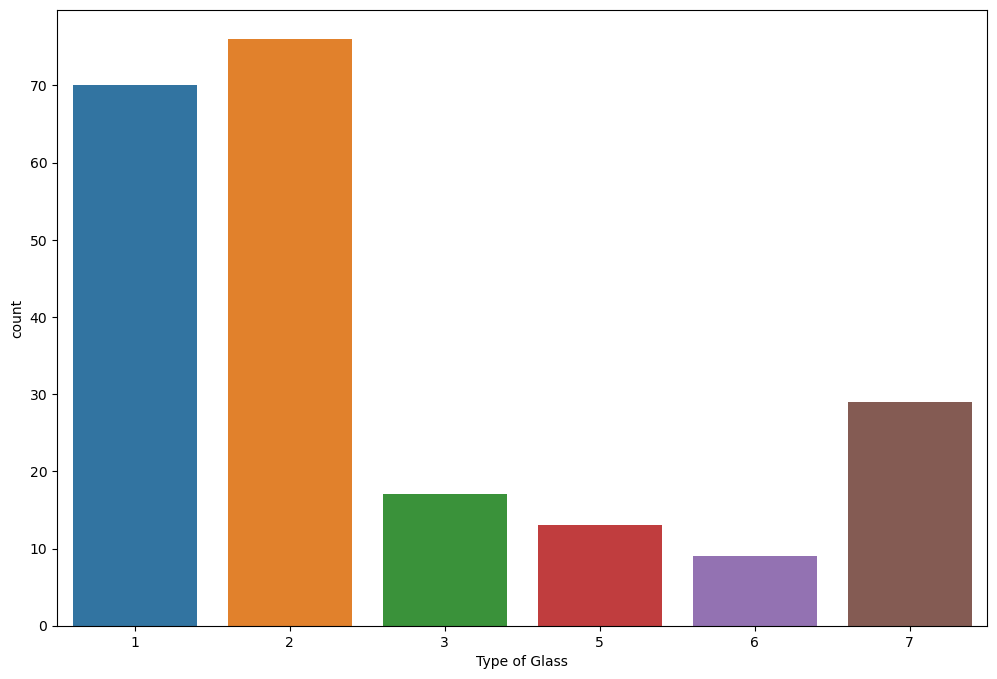

In [210]:
plt.figure(figsize=(12,8))
sns.countplot(df["Type of Glass"])
print('Value count:- \n',df["Type of Glass"].value_counts())

In [211]:
df.nunique().to_frame("No of unique values ")    #checking number of unique values present in each column

,No of unique values
Ri,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of Glass,6


# PLOTTING

<AxesSubplot:xlabel='Ri', ylabel='Density'>

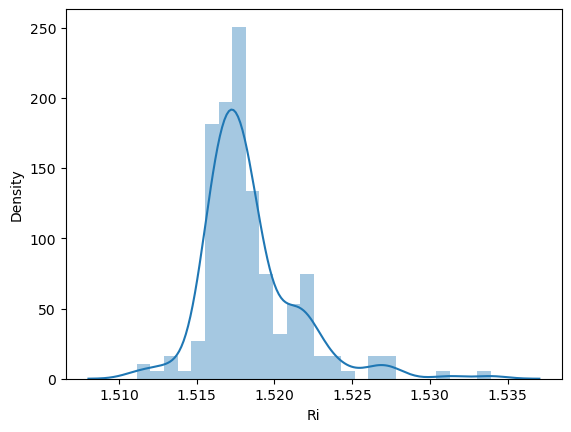

In [15]:
sns.distplot(df['Ri'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

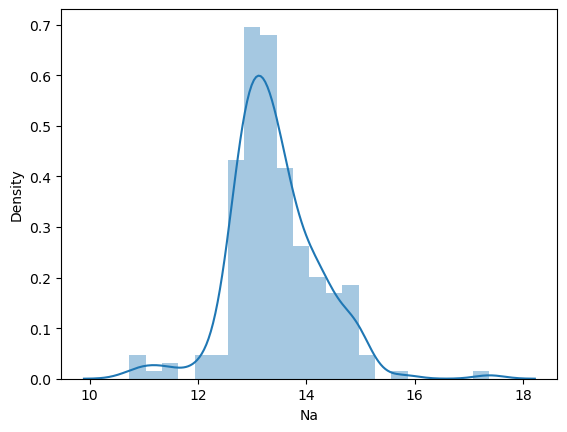

In [16]:
sns.distplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

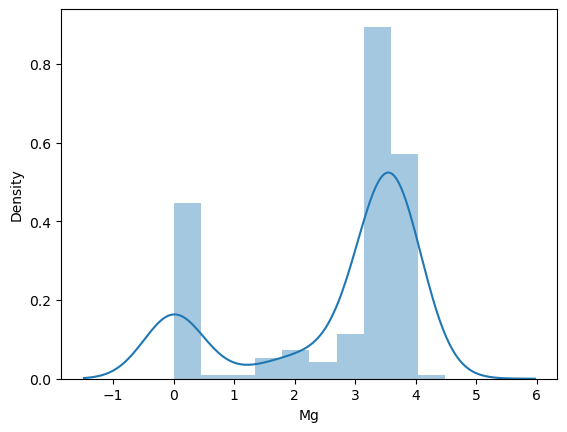

In [17]:
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

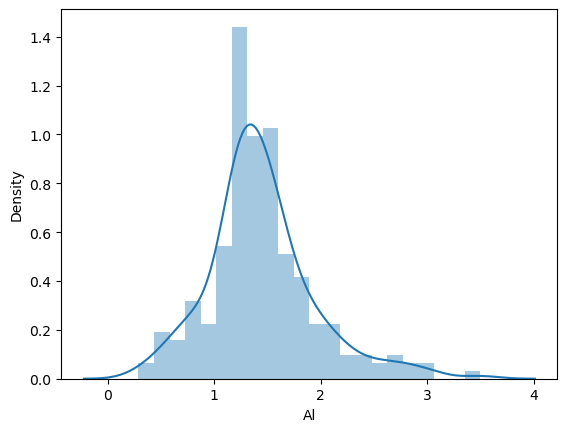

In [18]:
sns.distplot(df['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

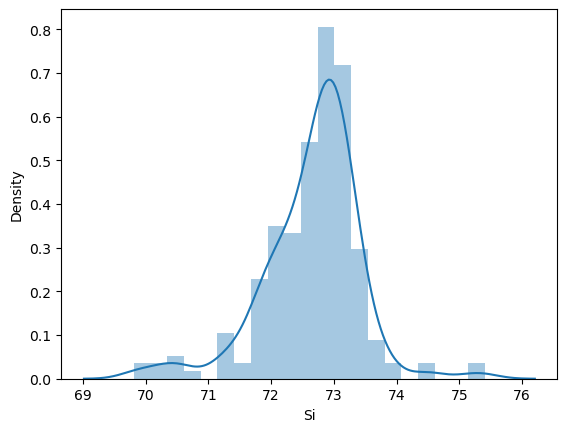

In [19]:
sns.distplot(df['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

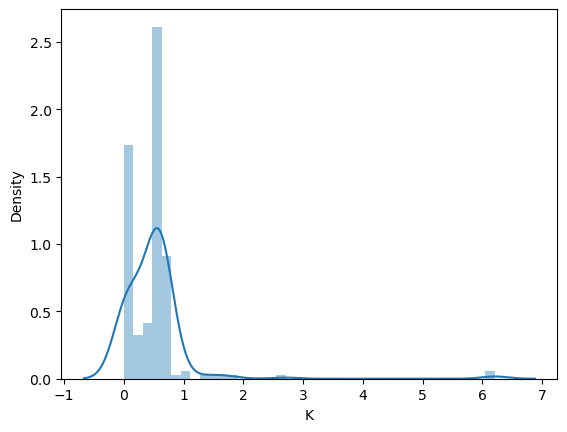

In [20]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

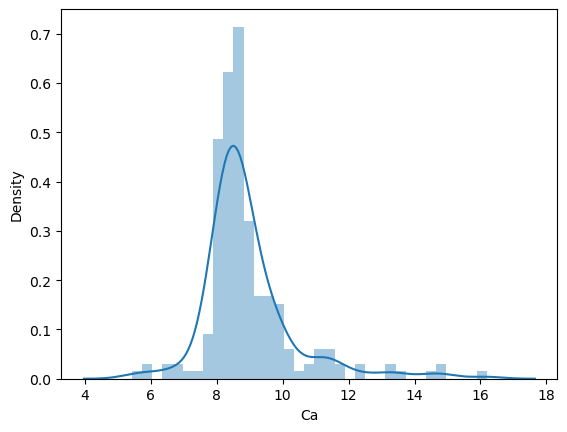

In [21]:
sns.distplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

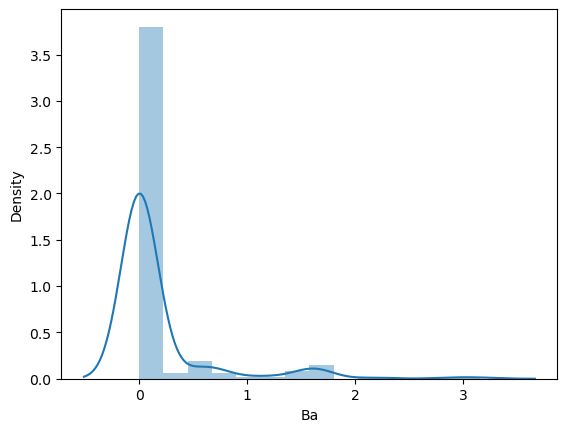

In [22]:
sns.distplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

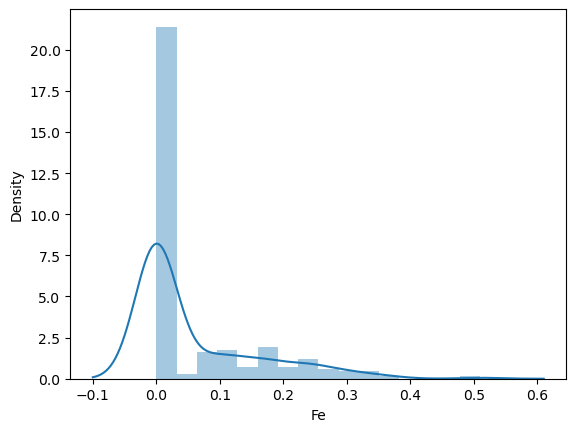

In [23]:
sns.distplot(df['Fe'])

# IT IS CLEAR FROM THE ABOVE PLOTS THAT THE DATA IS HIGHLY SKEWED.

<Figure size 800x1200 with 0 Axes>

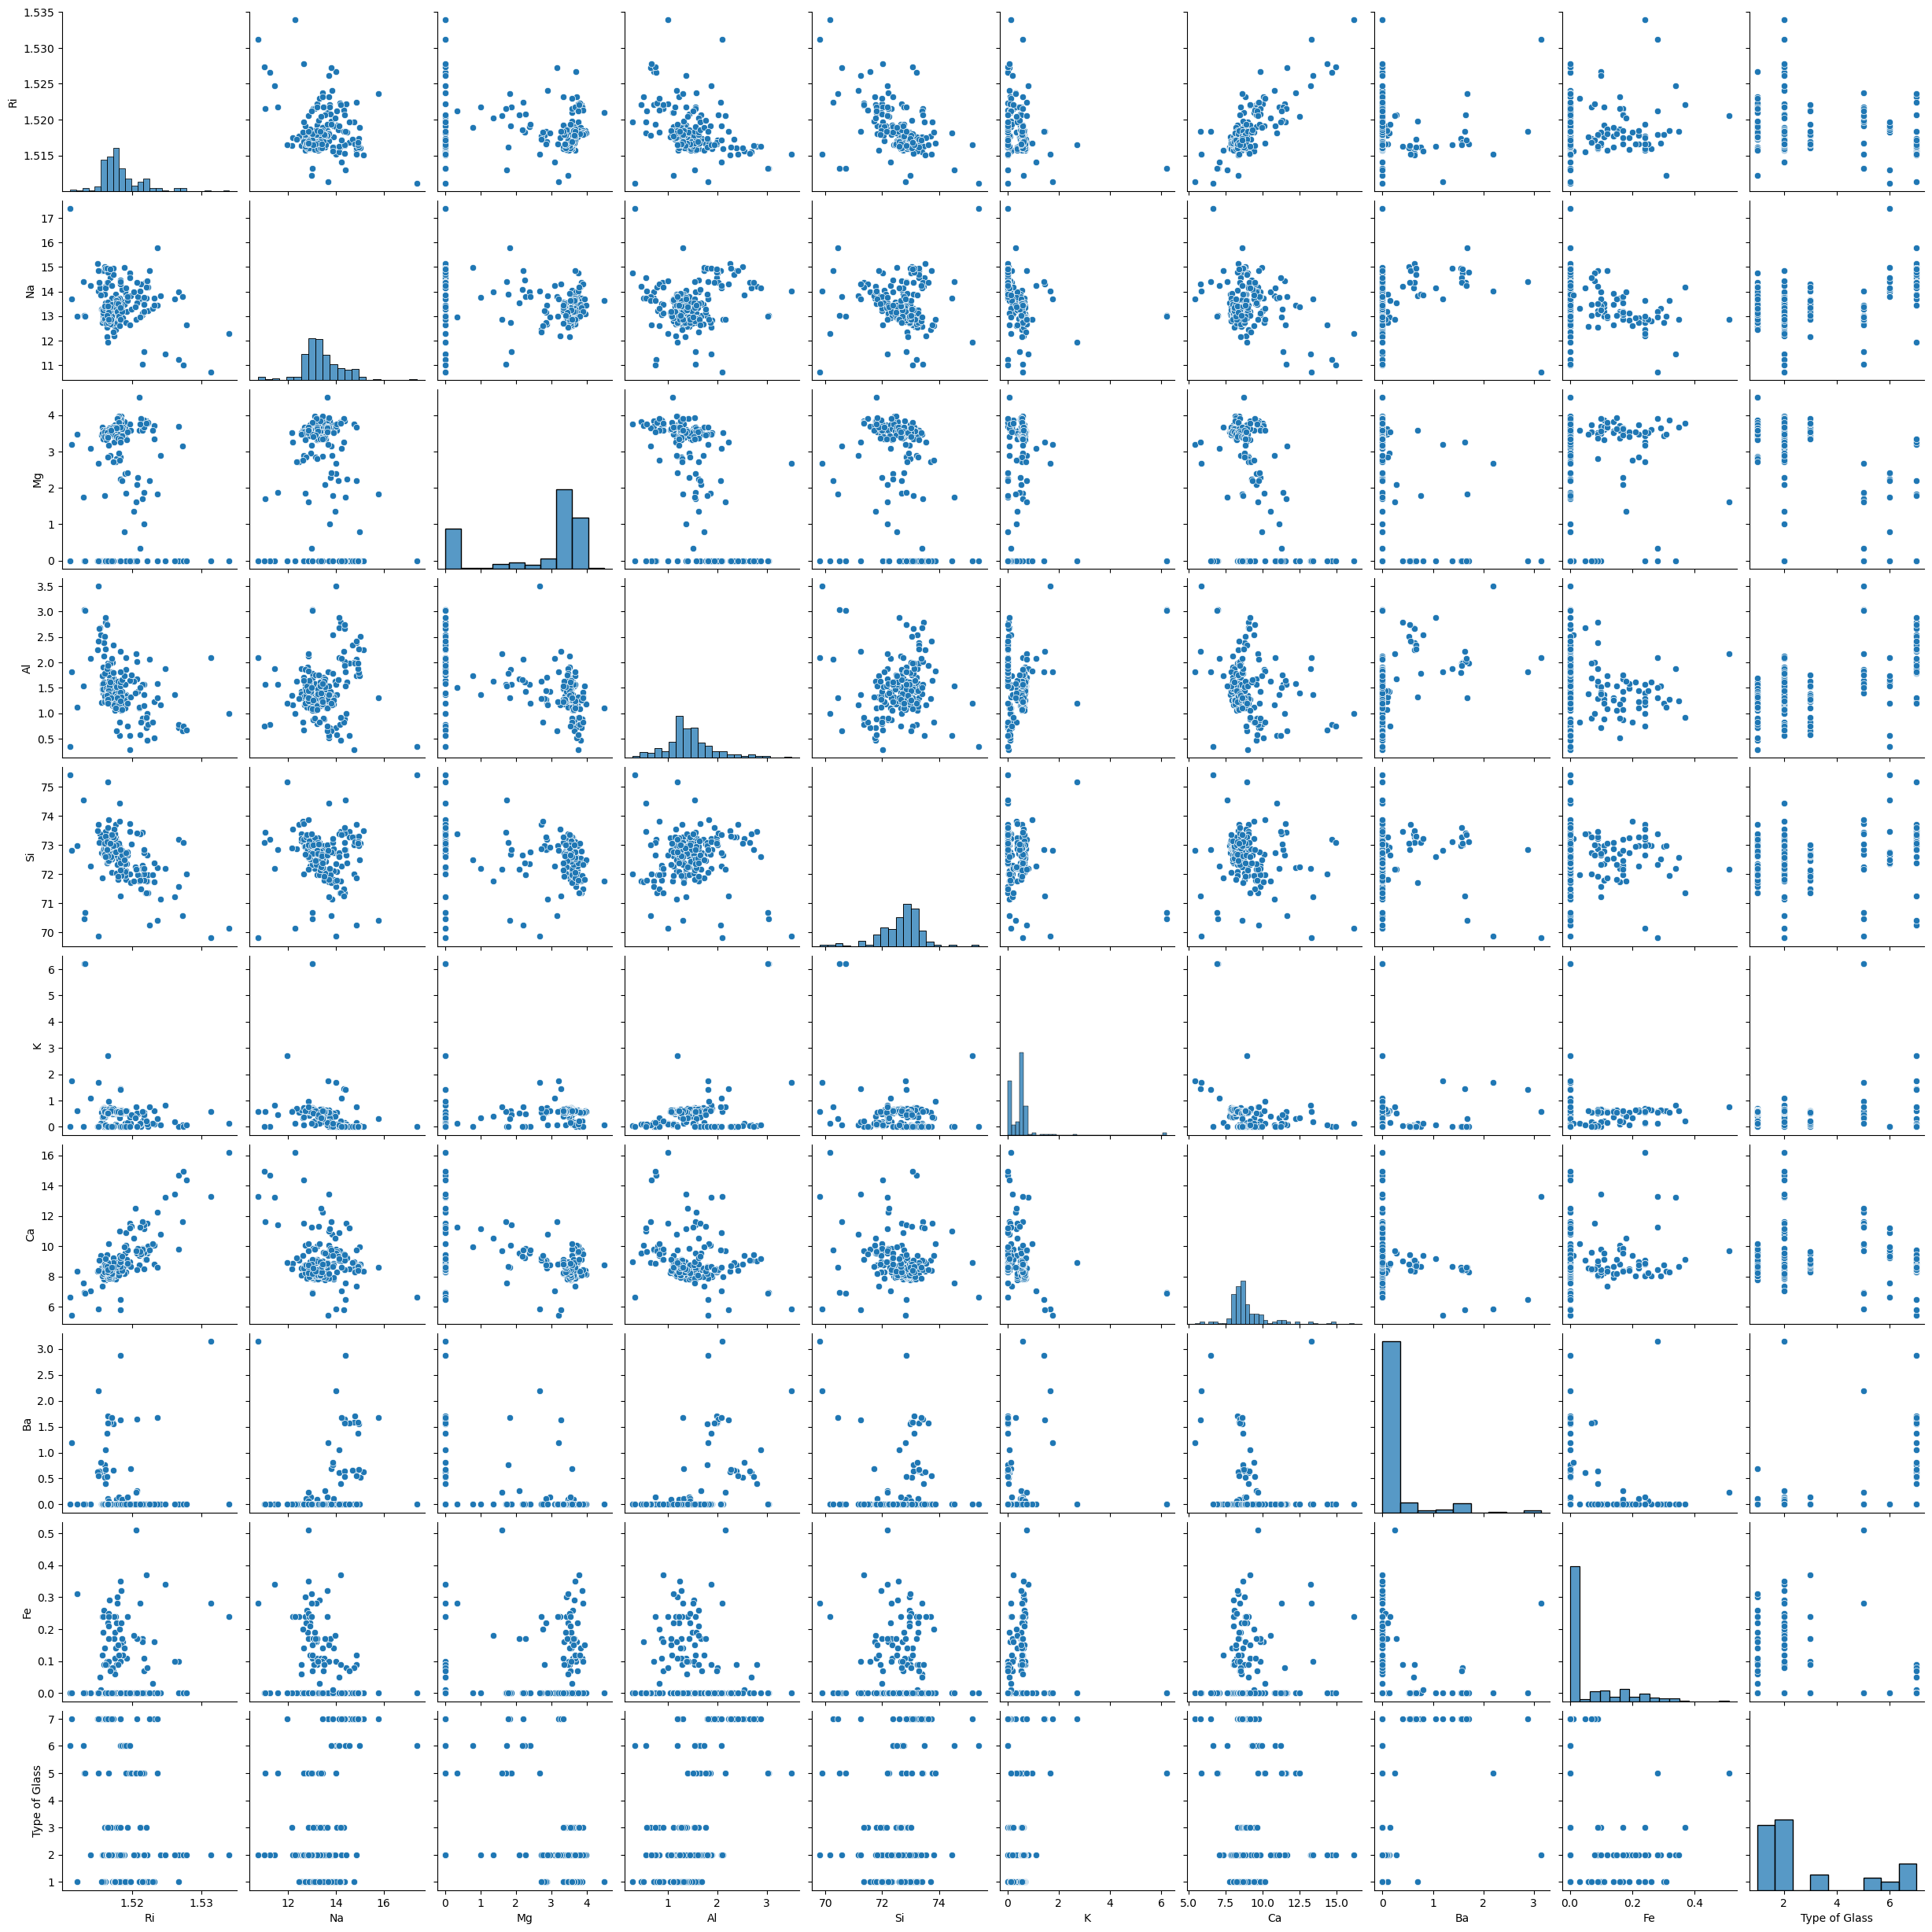

In [30]:
plt.figure(figsize=(8,12))
sns.pairplot(df)
plt.show()

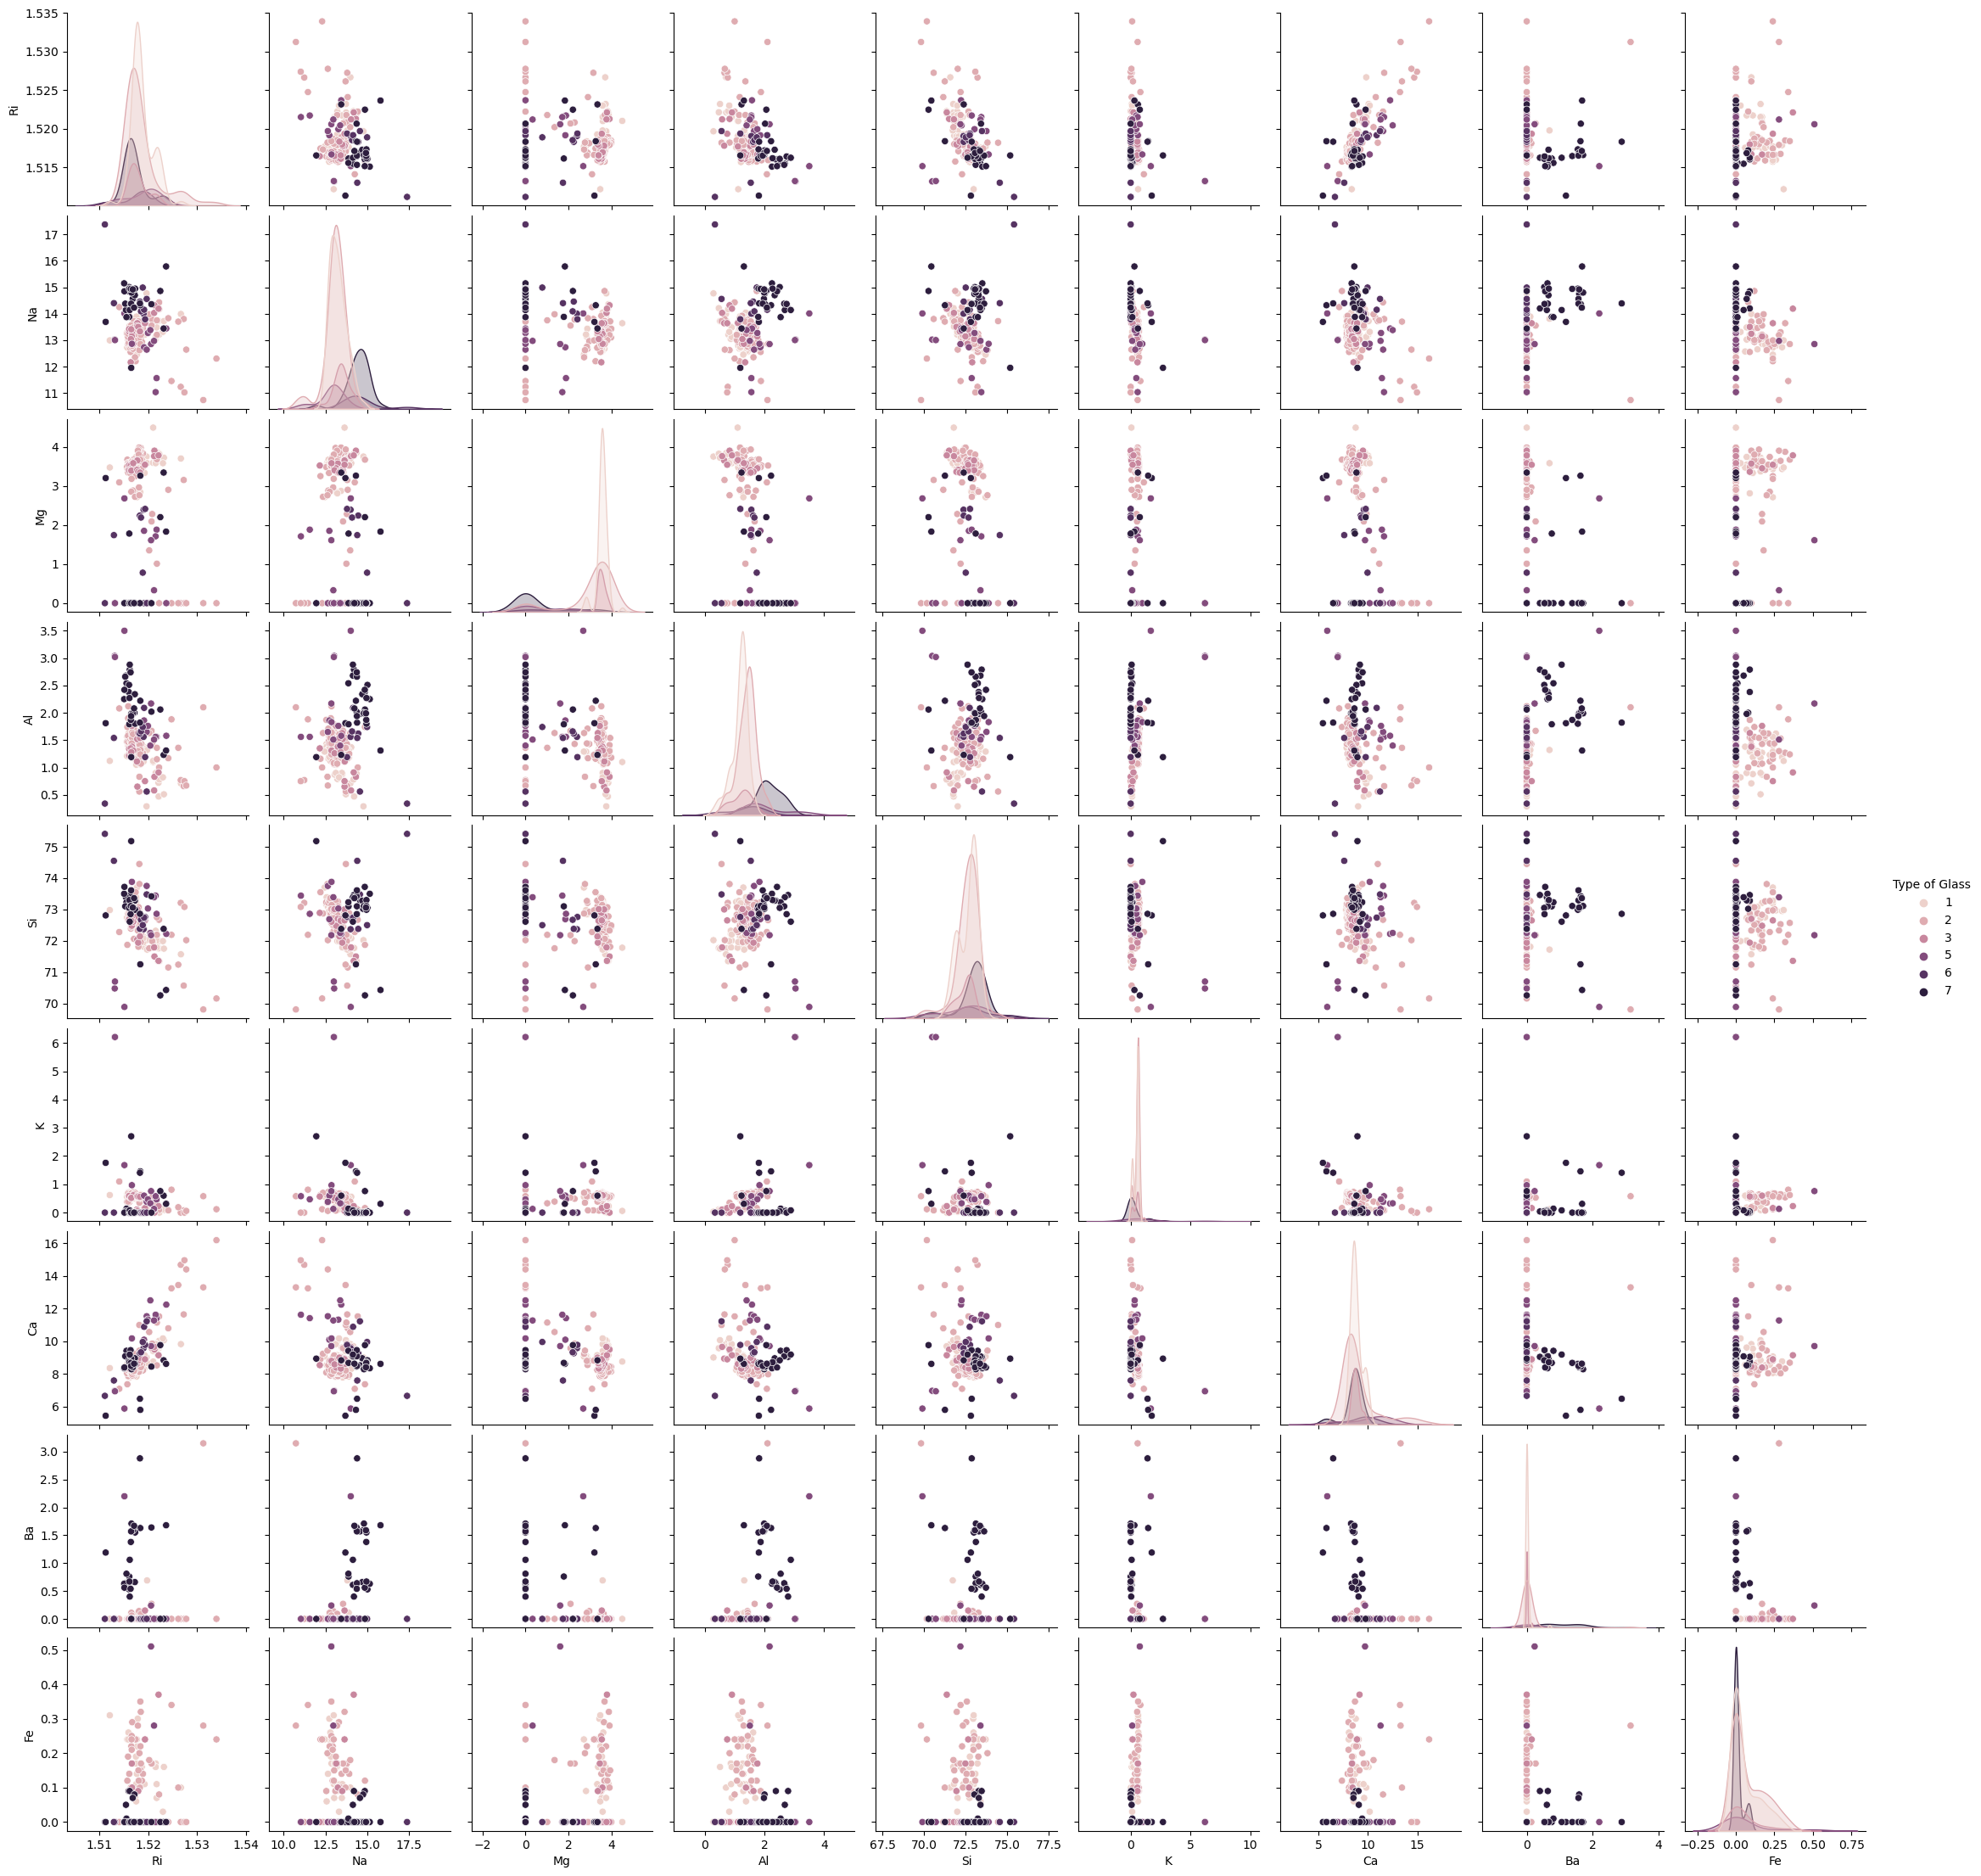

In [31]:
sns.pairplot(df, hue="Type of Glass")

Ri                  AxesSubplot(0.125,0.53;0.133621x0.35)
Na               AxesSubplot(0.285345,0.53;0.133621x0.35)
Mg                AxesSubplot(0.44569,0.53;0.133621x0.35)
Al               AxesSubplot(0.606034,0.53;0.133621x0.35)
Si               AxesSubplot(0.766379,0.53;0.133621x0.35)
K                   AxesSubplot(0.125,0.11;0.133621x0.35)
Ca               AxesSubplot(0.285345,0.11;0.133621x0.35)
Ba                AxesSubplot(0.44569,0.11;0.133621x0.35)
Fe               AxesSubplot(0.606034,0.11;0.133621x0.35)
Type of Glass    AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

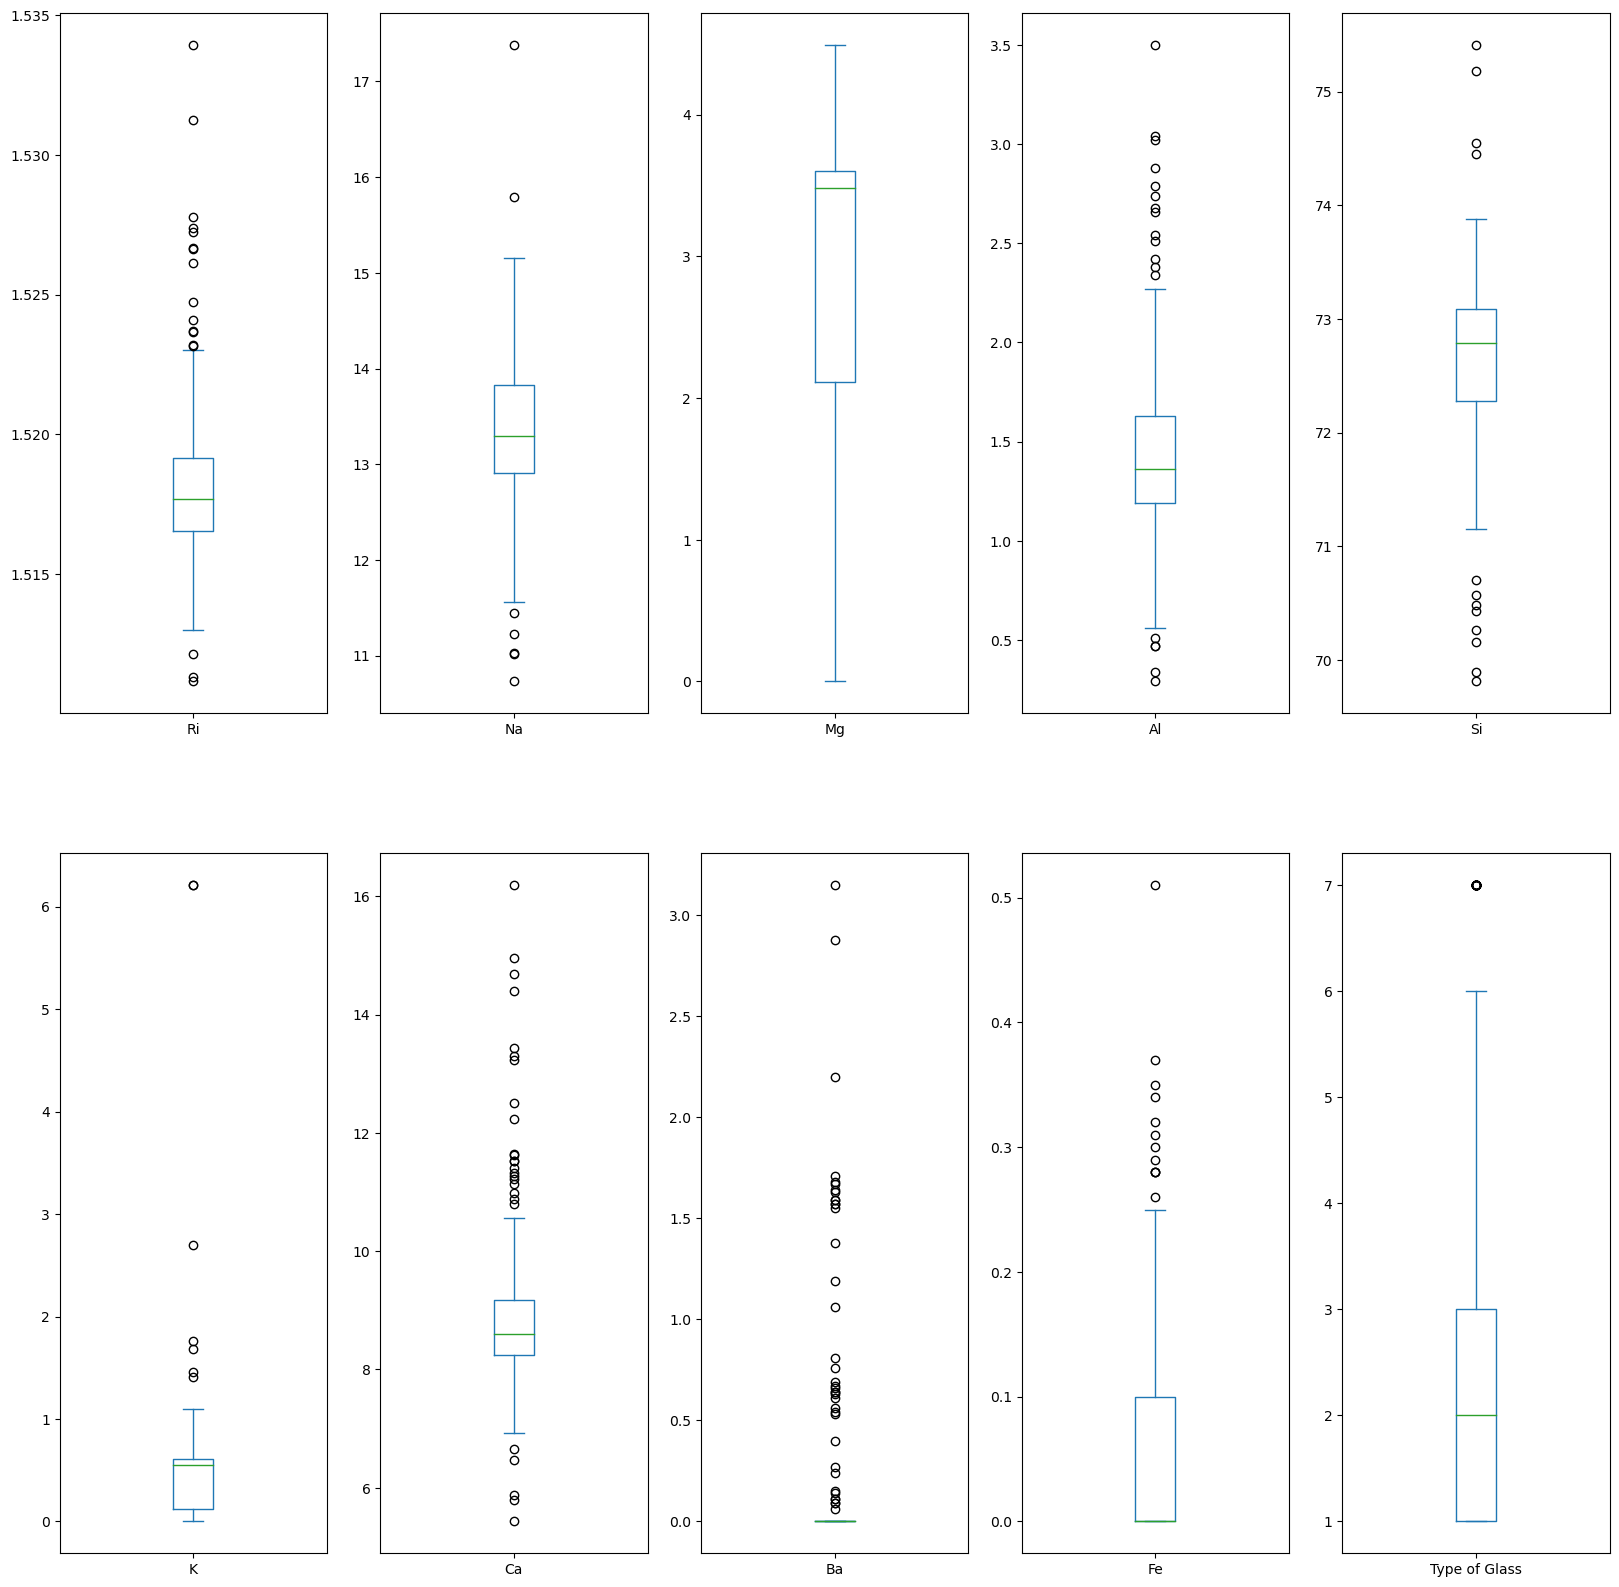

In [35]:
df.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,20))

In [212]:
df.corr()    #CHECKING FOR CORRELATION

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [37]:
df.corr()['Type of Glass'].sort_values()

Mg              -0.744993
Fe              -0.188278
Ri              -0.164237
K               -0.010054
Ca               0.000952
Si               0.151565
Na               0.502898
Ba               0.575161
Al               0.598829
Type of Glass    1.000000
Name: Type of Glass, dtype: float64

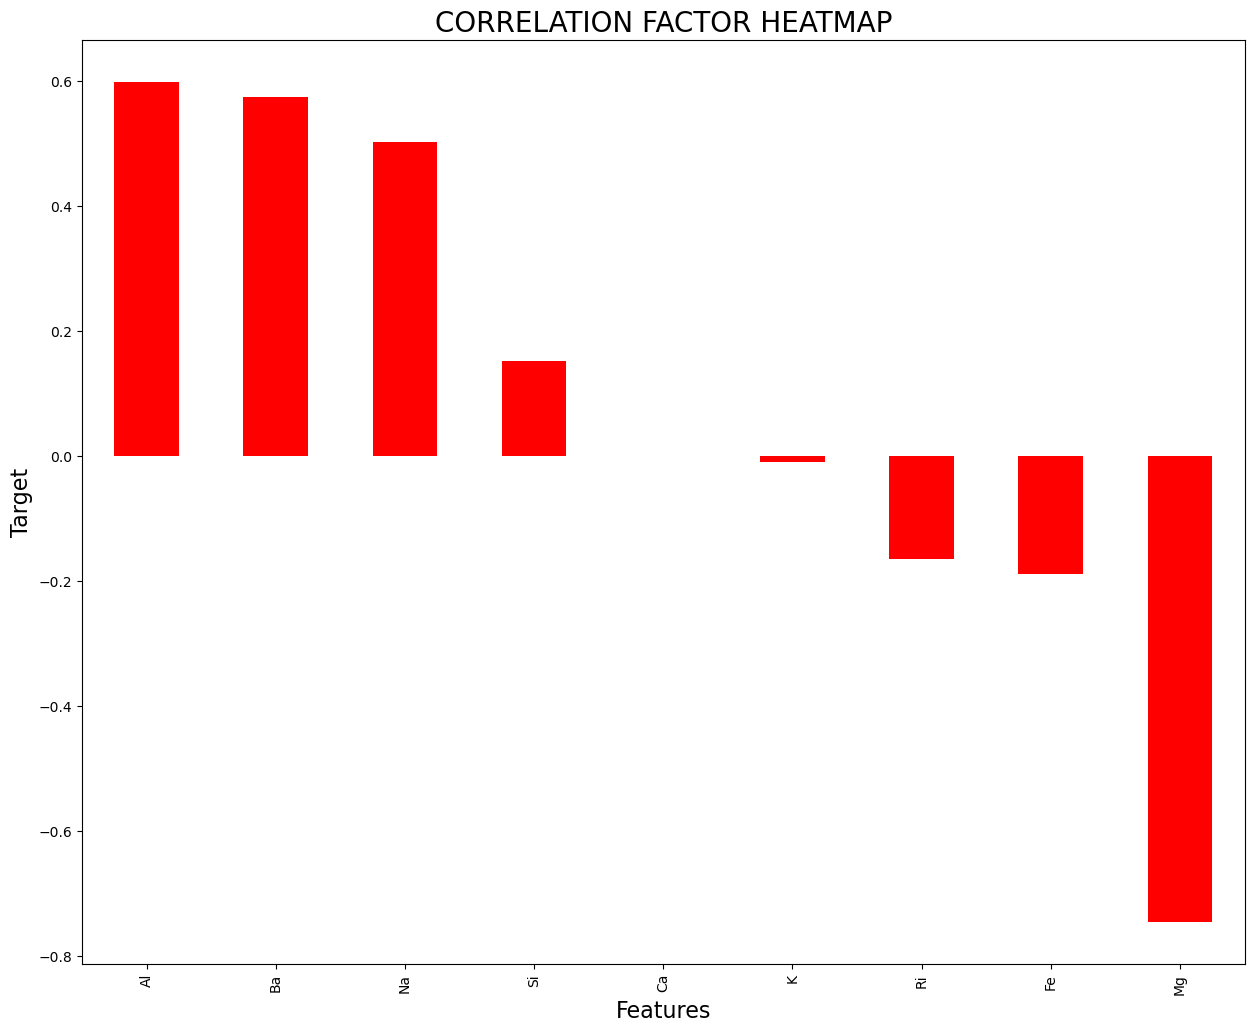

In [38]:
plt.figure(figsize=(15,12))                 #Plotting Heat Map
df.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('CORRELATION FACTOR HEATMAP',fontsize=20)
plt.show()

In [213]:
df.drop('Ba',axis=1,inplace=True)      #DROPPING THE "BA" AND "FE" COLUMNS AS THEY ARE NOT OF MUCH IMPORTANCE
df.drop('Fe',axis=1,inplace=True)

In [214]:
df.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,7.000000


In [215]:
df.skew()                #CHECKING FOR THE SKEWNESS

Ri               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Type of Glass    1.114915
dtype: float64

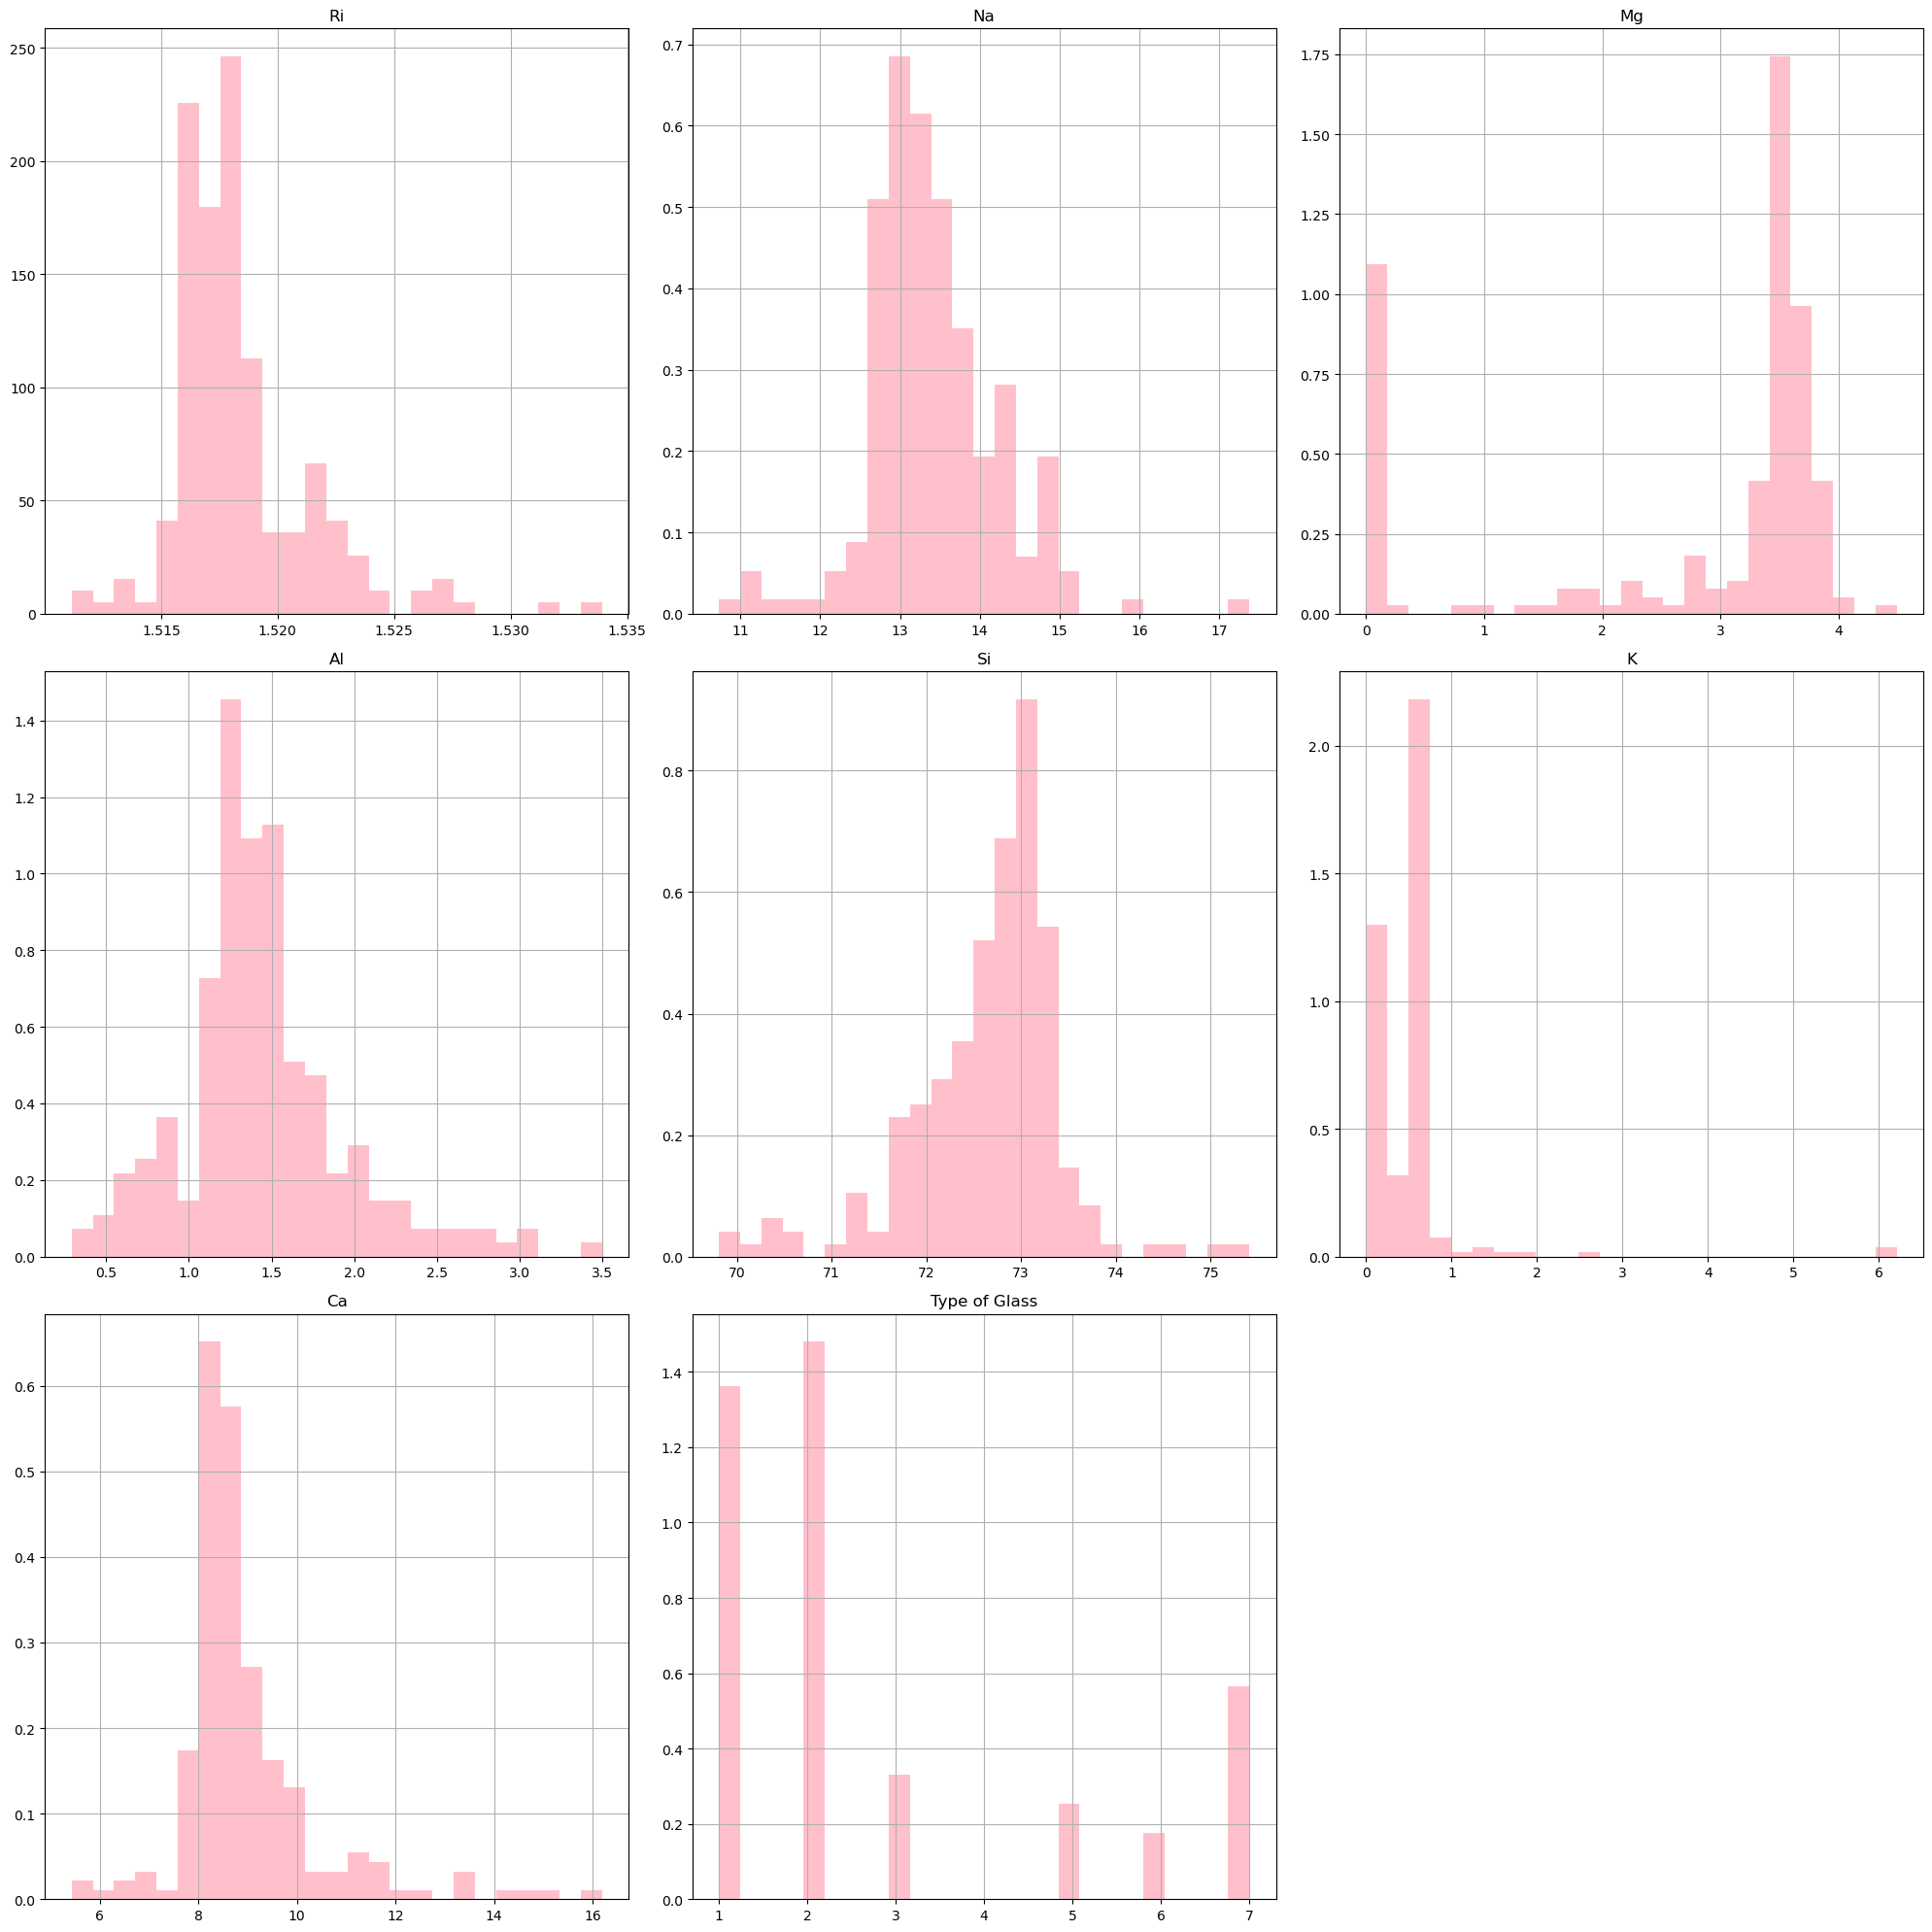

In [47]:
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [216]:
Features=df[['Ri','Na','Al','Si','K','Ca']]        #REMOVING THE OUTLIERS
z=np.abs(zscore(Features))
z

,Ri,Na,Al,Si,K,Ca
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699
...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931


In [217]:
new_df=df[(z<3).all(axis=1)]
new_df               #NEW DATAFRAME AFTER REMOVING OUTLIERS

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [218]:
new_df.shape        #CHECKING SHAPE OF NEW DATASET

(201, 8)

In [52]:
df.shape

(214, 8)

In [219]:
lostdata=((df.shape[0] - new_df.shape[0])/df.shape[0])*100     #CALCULATING PERCENTAGE OF LOST DATA
print(" percentage of lost data is:-", lostdata)

 percentage of lost data is:- 6.074766355140187


# IQR METHOD

In [61]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
QQ=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [62]:
print("Old  data in Rows and Column:",df.shape)
print("\nNew  data in Rows and Column:",QQ.shape)
print("\nTotal Dropped rows:",df.shape[0]-QQ.shape[0])

Old  data in Rows and Column: (214, 8)

New  data in Rows and Column: (153, 8)

Total Dropped rows: 61


Ri                  AxesSubplot(0.125,0.53;0.133621x0.35)
Na               AxesSubplot(0.285345,0.53;0.133621x0.35)
Mg                AxesSubplot(0.44569,0.53;0.133621x0.35)
Al               AxesSubplot(0.606034,0.53;0.133621x0.35)
Si               AxesSubplot(0.766379,0.53;0.133621x0.35)
K                   AxesSubplot(0.125,0.11;0.133621x0.35)
Ca               AxesSubplot(0.285345,0.11;0.133621x0.35)
Type of Glass     AxesSubplot(0.44569,0.11;0.133621x0.35)
dtype: object

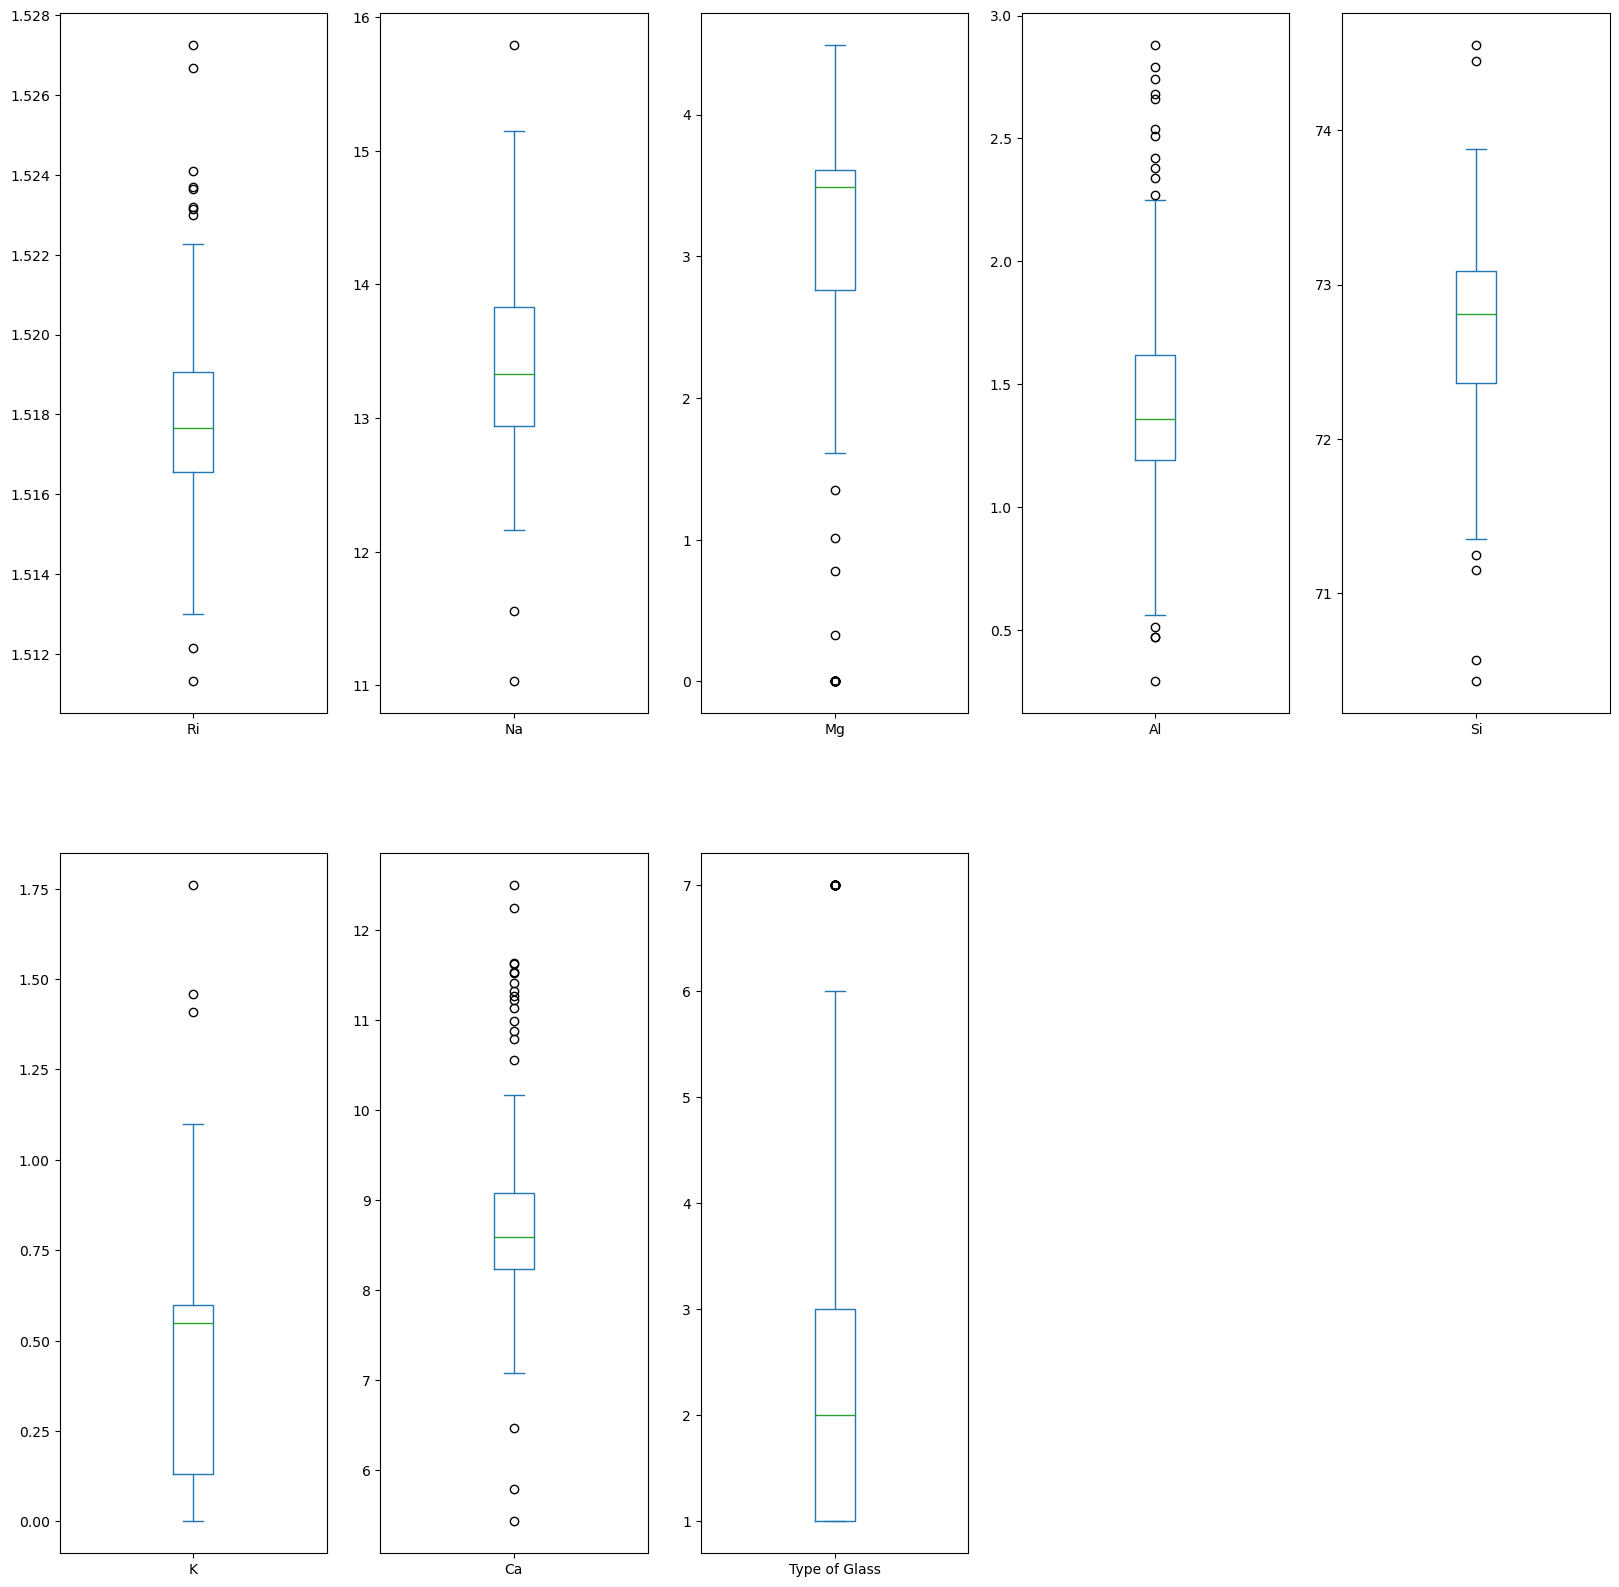

In [64]:
new_df.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,20))

In [66]:
pt=PowerTransformer(method='yeo-johnson')

In [67]:
new_df[['Ri','Na','Mg','Al','Si','K','Ca']]=pt.fit_transform(new_df[['Ri','Na','Mg','Al','Si','K','Ca']].values)

In [68]:
pp=['Ri','Na','Mg','Al','Si','K','Ca']

In [69]:
new_df.skew()

Ri               0.000000
Na              -0.026383
Mg              -0.989652
Al               0.013277
Si               0.056350
K                0.005150
Ca              -0.062276
Type of Glass    1.180372
dtype: float64

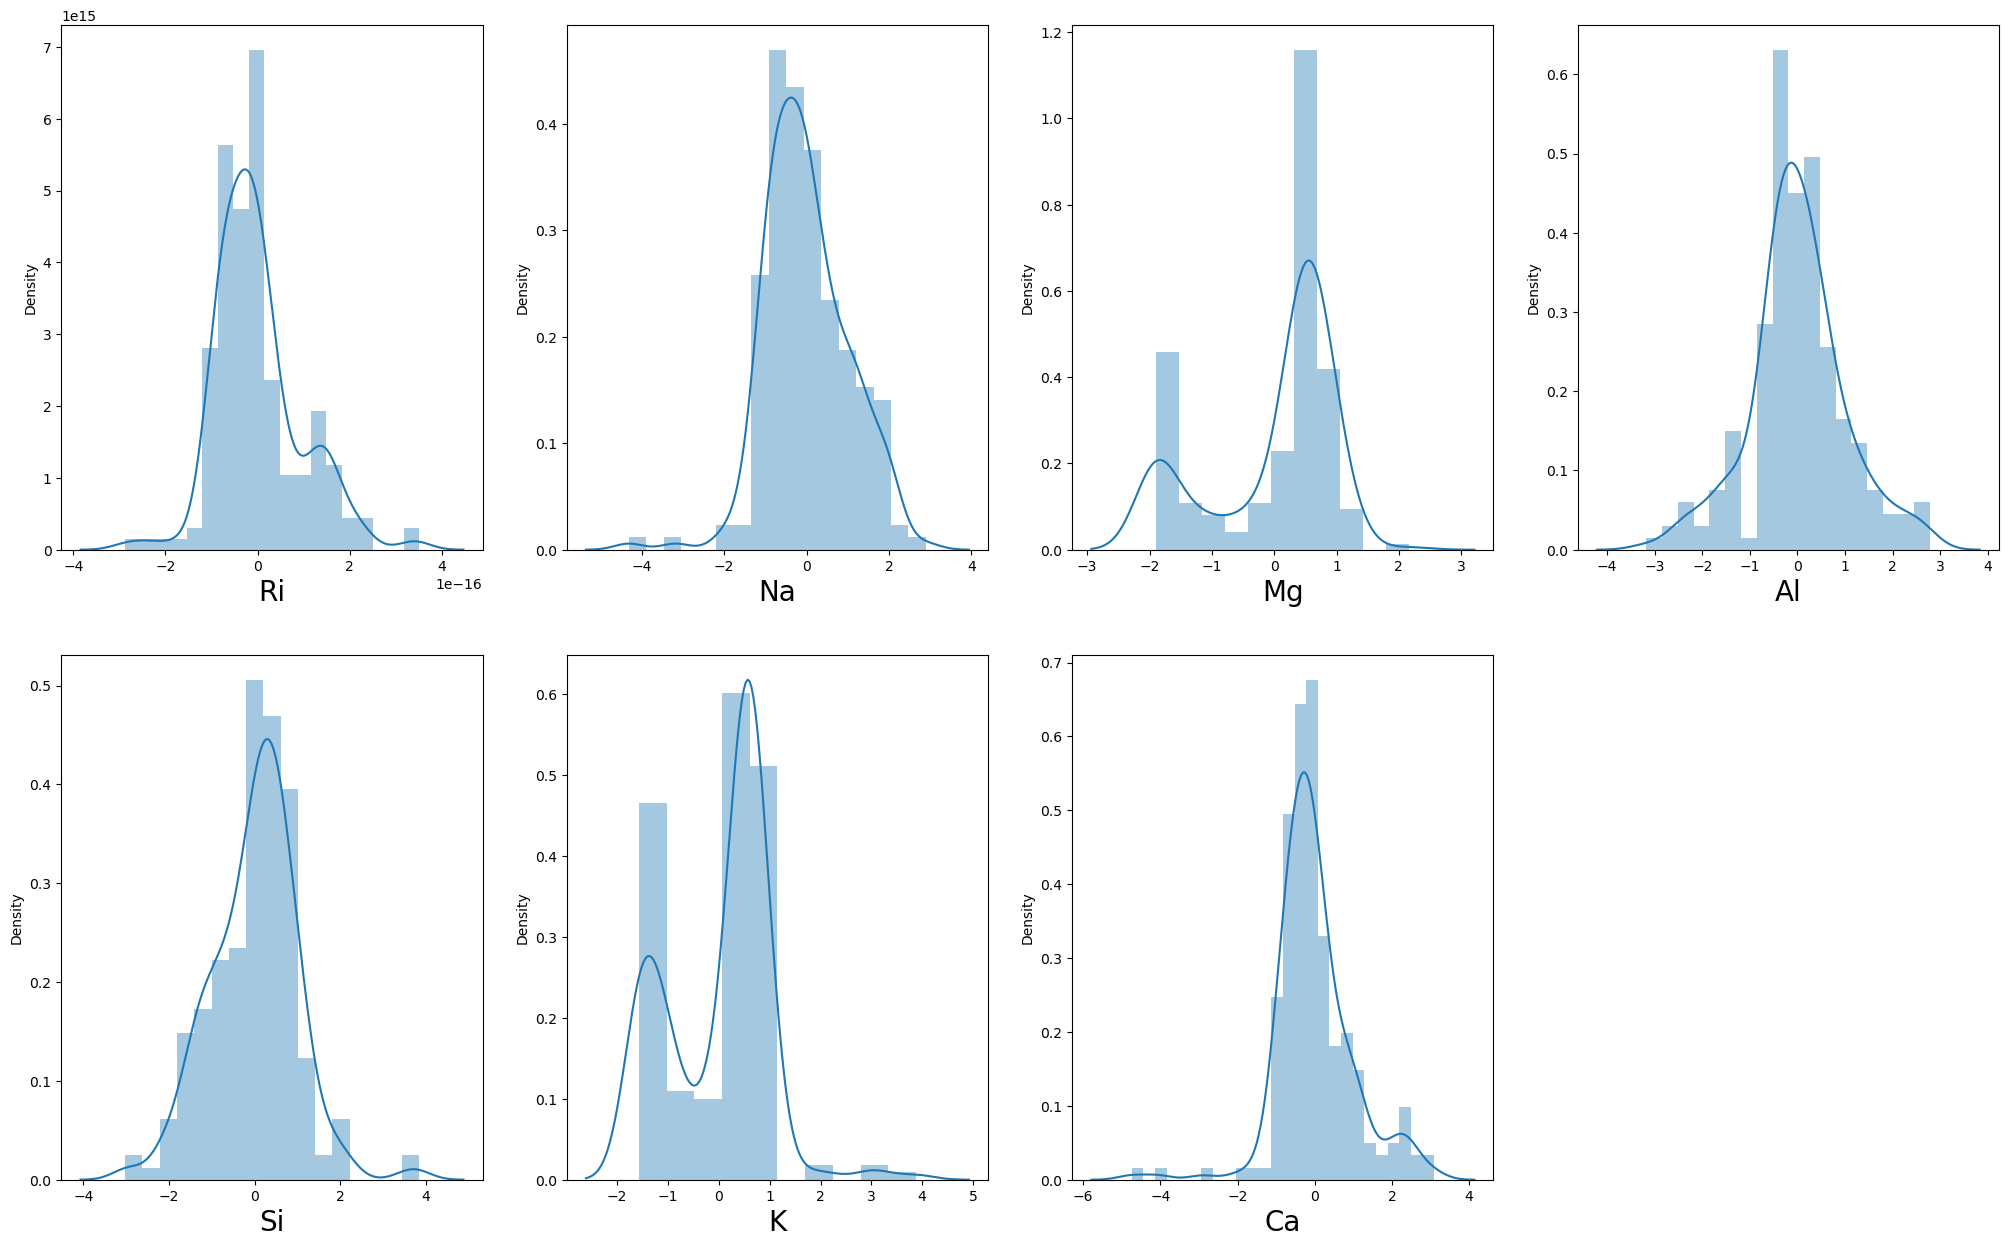

In [72]:
plt.figure(figsize=(25,15))
plotnumber=1
for column in new_df[pp]:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [73]:
new_df.head()

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840,1
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673,1
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042,1
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259,1
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200,1


In [74]:
x=new_df.loc [:,new_df.columns != 'Type of Glass']

In [75]:
y=new_df.loc[:,'Type of Glass']

In [76]:
x

,Ri,Na,Mg,Al,Si,K,Ca
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
209,-7.632783e-17,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
210,-4.857226e-17,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
211,1.006140e-16,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
212,-6.591949e-17,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 201, dtype: int64

In [79]:
x.shape, y.shape

((201, 7), (201,))

In [81]:
scaled=StandardScaler()
x=pd.DataFrame(scaled.fit_transform(x),columns=x.columns)
x

,Ri,Na,Mg,Al,Si,K,Ca
0,1.276094,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-0.187233,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-0.862614,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-0.187233,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-0.299796,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
196,-0.825093,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
197,-0.524923,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
198,1.088488,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
199,-0.712529,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


In [83]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [84]:
vif_cal()

   VIF FACTOR FEATURES
0    4.406308       Ri
1    6.468622       Na
2    8.363145       Mg
3    3.969032       Al
4    5.018795       Si
5    4.389737        K
6    6.854219       Ca


In [97]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

     ------------------------------------ 226.0/226.0 kB 726.5 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 392.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [98]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [99]:
x.shape

(420, 7)

In [100]:
y.shape

(420,)

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

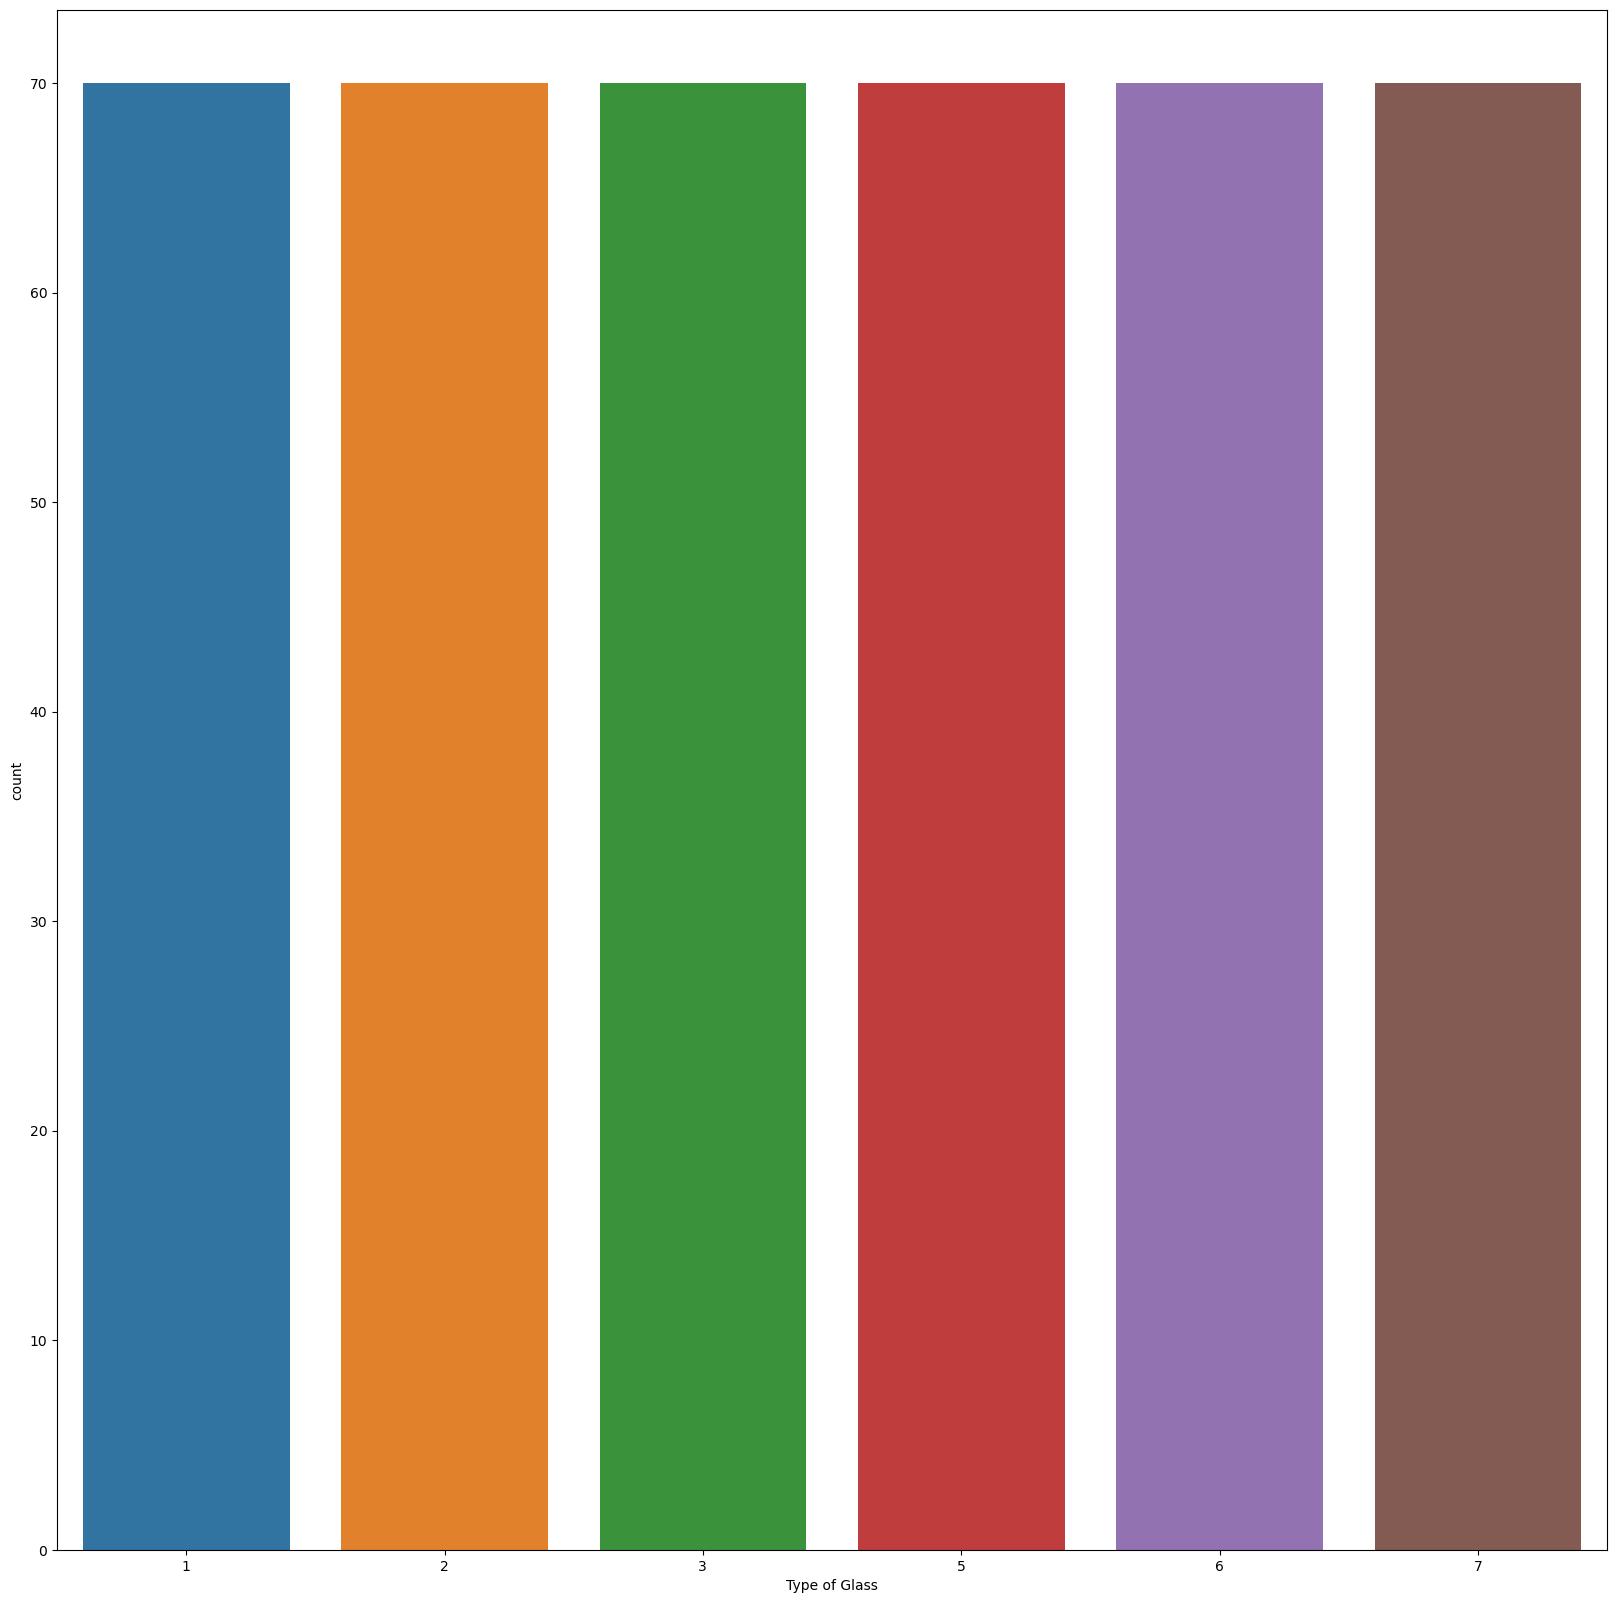

In [101]:
sns.countplot(y)

# LOGISTIC REGRESSION MODEL

In [154]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  2  The model performs very well
At random_state:- 2
Training accuaracy_score is :- 79.8
Testing accuracy_score is:- 79.8 


At random state  68  The model performs very well
At random_state:- 68
Training accuaracy_score is :- 84.5
Testing accuracy_score is:- 84.5 




In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=68)

In [156]:
lr.fit(x_train,y_train)

LogisticRegression()

In [157]:
pred_test=lr.predict(x_test)
accuracy_score(y_test,pred_test)

0.8452380952380952

In [158]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.50      0.75      0.60         8
           2       0.73      0.57      0.64        14
           3       0.93      0.76      0.84        17
           5       0.92      1.00      0.96        12
           6       0.94      0.94      0.94        18
           7       0.94      1.00      0.97        15

    accuracy                           0.85        84
   macro avg       0.83      0.84      0.83        84
weighted avg       0.86      0.85      0.85        84



In [159]:
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

In [160]:
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 72.85714285714286
Accuracy_score is :- 84.52380952380952


At cv:- 3
Cross validation score is :- 78.80952380952381
Accuracy_score is :- 84.52380952380952


At cv:- 4
Cross validation score is :- 80.47619047619048
Accuracy_score is :- 84.52380952380952


At cv:- 5
Cross validation score is :- 80.95238095238095
Accuracy_score is :- 84.52380952380952


At cv:- 6
Cross validation score is :- 80.47619047619047
Accuracy_score is :- 84.52380952380952


At cv:- 7
Cross validation score is :- 81.66666666666667
Accuracy_score is :- 84.52380952380952


At cv:- 8
Cross validation score is :- 80.95518867924528
Accuracy_score is :- 84.52380952380952


At cv:- 9
Cross validation score is :- 82.13588241340321
Accuracy_score is :- 84.52380952380952




In [167]:
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss) 

The cv score is :-  0.8095238095238095 
The accuracy_score is: 0.8452380952380952


In [168]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.8809523809523809
[[ 6  2  0  0  0  0]
 [ 3  8  0  2  0  1]
 [ 2  0 15  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.55      0.75      0.63         8
           2       0.80      0.57      0.67        14
           3       1.00      0.88      0.94        17
           5       0.86      1.00      0.92        12
           6       1.00      1.00      1.00        18
           7       0.94      1.00      0.97        15

    accuracy                           0.88        84
   macro avg       0.86      0.87      0.85        84
weighted avg       0.89      0.88      0.88        84

CV  :- 0.8690476190476192


In [169]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.8333333333333334
[[ 5  3  0  0  0  0]
 [ 3 10  0  1  0  0]
 [ 3  1 13  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  1  0  0 16  1]
 [ 0  0  0  0  1 14]]
              precision    recall  f1-score   support

           1       0.45      0.62      0.53         8
           2       0.67      0.71      0.69        14
           3       1.00      0.76      0.87        17
           5       0.92      1.00      0.96        12
           6       0.94      0.89      0.91        18
           7       0.93      0.93      0.93        15

    accuracy                           0.83        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.86      0.83      0.84        84

CV  :- 0.7857142857142856


In [170]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))
print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())

0.8809523809523809
[[ 6  2  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 3  0 14  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 18  0]
 [ 0  1  0  0  0 14]]
              precision    recall  f1-score   support

           1       0.46      0.75      0.57         8
           2       0.77      0.71      0.74        14
           3       1.00      0.82      0.90        17
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        18
           7       1.00      0.93      0.97        15

    accuracy                           0.88        84
   macro avg       0.87      0.87      0.86        84
weighted avg       0.91      0.88      0.89        84

CV  :- 0.8571428571428573


In [171]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())

0.8571428571428571
[[ 6  1  1  0  0  0]
 [ 4  6  1  2  1  0]
 [ 1  0 16  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 18  0]
 [ 1  0  0  0  0 14]]
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         8
           2       0.86      0.43      0.57        14
           3       0.89      0.94      0.91        17
           5       0.86      1.00      0.92        12
           6       0.95      1.00      0.97        18
           7       1.00      0.93      0.97        15

    accuracy                           0.86        84
   macro avg       0.84      0.84      0.82        84
weighted avg       0.87      0.86      0.85        84

CV  :- 0.8404761904761905


In [173]:
Z=pd.DataFrame([["LR","84.52%"],["Decision Tree Classifier","83%"],["KNeighbors Classifier","85.71%"],
                ["Random Forest Classifier","88.09%"],["Gradient Boosting","88%"]],
                    columns=["Model_Name","AccuracyScore"])
Z

,Model_Name,AccuracyScore
0,LR,84.52%
1,Decision Tree Classifier,83%
2,KNeighbors Classifier,85.71%
3,Random Forest Classifier,88.09%
4,Gradient Boosting,88%


In [182]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [189]:
parameters={'n_estimators' : [10, 50, 100],
              'max_depth' : [10, 20, 30],
              'learning_rate': [0.01,0.1,1,10,100]}

In [190]:
jj=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
jj.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 50, 100]})

In [192]:
jj.best_params_

{'learning_rate': 1, 'max_depth': 10, 'n_estimators': 100}

In [193]:
gb=GradientBoostingClassifier(learning_rate=1,max_depth=10, n_estimators=100)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('Accuracy =',accuracy_score(y_test,pred)*100)

Accuracy = 84.52380952380952


# SAVING THE MODEL USING PKL

In [195]:
joblib.dump(gb,"Glass.pkl")

['Glass.pkl']

In [199]:
kk=joblib.load("Glass.pkl")          #LOADING THE SAVED MODEL
prediction=kk.predict(x_test)
prediction

array([7, 1, 3, 5, 5, 6, 7, 6, 3, 2, 1, 7, 1, 6, 5, 3, 5, 6, 6, 6, 6, 7,
       7, 2, 7, 5, 5, 5, 1, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 5, 1, 6, 1, 7,
       1, 6, 1, 7, 5, 1, 1, 6, 1, 3, 7, 3, 1, 7, 7, 3, 2, 7, 3, 6, 5, 1,
       5, 2, 6, 2, 7, 6, 6, 2, 3, 3, 5, 7, 2, 7, 2, 7, 6, 6], dtype=int64)

In [198]:
pd.DataFrame([kk.predict(x_test)[:],y_test[:]],index=["predcited","original"])

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
predcited,7,1,3,5,5,6,7,6,3,2,...,3,3,5,7,2,7,2,7,6,6
original,7,2,3,5,5,6,7,6,3,2,...,3,3,5,7,1,7,2,7,6,6


# DONE>>>>>>>>>>>>>>